In [1]:
# General
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import sys
import glob
from datetime import datetime
from os.path import isfile
import tqdm

# Climate indices
import climate_indices as ci
from climate_indices import indices

# Time format utils
from datetime import timedelta
from dateutil import parser

# Plotting utils
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Path, PathPatch
import cartopy.crs as ccrs

# Statistics utils
from sklearn import metrics as mt
import spotpy
import scipy.stats as stats
from scipy.stats.stats import pearsonr
import statsmodels.api as sm

# Interpolation
from scipy.interpolate import griddata

2019-04-25  10:47:18 DEBUG CACHEDIR=C:\Users\sainzmazam\.matplotlib
2019-04-25  10:47:18 DEBUG Using fontManager instance from C:\Users\sainzmazam\.matplotlib\fontList.json
2019-04-25  10:47:18 DEBUG backend module://ipykernel.pylab.backend_inline version unknown
2019-04-25  10:47:18 DEBUG Trying `CDLL(C:\Users\sainzmazam\AppData\Local\Continuum\anaconda3\Library\bin\geos_c.dll)`
2019-04-25  10:47:18 DEBUG Library path: 'C:\\Users\\sainzmazam\\AppData\\Local\\Continuum\\anaconda3\\Library\\bin\\geos_c.dll'
2019-04-25  10:47:18 DEBUG DLL: <CDLL 'C:\Users\sainzmazam\AppData\Local\Continuum\anaconda3\Library\bin\geos_c.dll', handle 7ffb55cb0000 at 0x14f5da45d68>
2019-04-25  10:47:19 DEBUG backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
from matplotlib import rc 

font = {'family': 'serif',
        'weight': 'normal',
        'size': 12,
        }
rc('font', **font)

## 1. Read SPAIN02 database

### 1.1. Daily

In [3]:
path_spain02  =  'E:\\MARTA\\DATA_SPAIN\\Meteorologicos\\Spain02\\'
name_spain02  =  'Spain02_v5.0_DD_010reg_aa3d_pr.nc'                  # precipitacion diaria

In [4]:
directory     =   path_spain02 + name_spain02
root_grp      =   Dataset(directory)

In [5]:
prec_sp02_d   = root_grp.variables['pr'][:]
time_sp02_d   = root_grp.variables['time'][:]
XX_sp02_d     = root_grp.variables['lon'][:]
YY_sp02_d     = root_grp.variables['lat'][:]

In [6]:
ref_1950 = parser.parse("1950 01 01 00:00")
time_sp02_d_date = [ref_1950 + timedelta(days = i) for i in time_sp02_d]

### 1.2 Monthly

In [7]:
path_spain02  =  'E:\\MARTA\\DATA_SPAIN\\Meteorologicos\\Spain02\\'
name_spain02  =  'Spain02_v5.0_MM_010reg_aa3d_pr.nc'                  # precipitacion mensual

In [8]:
directory     =   path_spain02 + name_spain02
root_grp      =   Dataset(directory)

In [9]:
prec_sp02_m   = root_grp.variables['pr'][:]
time_sp02_m   = root_grp.variables['time'][:]
XX_sp02_m     = root_grp.variables['lon'][:]
YY_sp02_m     = root_grp.variables['lat'][:]

In [10]:
ref_1950 = parser.parse("1950 01 01 00:00")
time_sp02_m_date = [ref_1950 + timedelta(days = i) for i in time_sp02_m]

In [11]:
[XX_sp, YY_sp] = np.meshgrid(XX_sp02_d, YY_sp02_d)

### 1.3. Lat/lon of the corners

#### lons

In [12]:
# Difference between neighboor cells

diff_xx = list(np.diff(XX_sp02_d.data))
diff_xx.append(diff_xx[-1])
diff_xx =  np.asarray(diff_xx)

# Add to coordinates of the center to obtain right corners
lons_corner = list(XX_sp02_d.data + diff_xx/2)

# Add first left corner
lons_corner.insert(0,lons_corner[0]-diff_xx[0])
lons_corner_sp02 =  np.asarray(lons_corner)

#### lats

In [13]:
# Difference between neighboor cells

diff_yy = list(np.diff(YY_sp02_d.data))
diff_yy.append(diff_yy[-1])
diff_yy =  np.asarray(diff_yy)

# Add to coordinates of the center to obtain right corners
lats_corner = list(YY_sp02_d.data + diff_yy/2)

# Add first left corner
lats_corner.insert(0,lats_corner[0]-diff_yy[0])
lats_corner_sp02 =  np.asarray(lats_corner)

## 2. Read CFSv2 database

### 2.1 Daily

In [14]:
path_cfs  =  'E:\\MARTA\\DATA_SPAIN\\Meteorologicos\\CFS_v2_seasonal_meteo_unican\\precipitation\\'
name_cfs  =  'pr_daily_9_lead.nc'                  # precipitacion mensual

In [15]:
directory     =   path_cfs + name_cfs
root_grp      =   Dataset(directory)

In [16]:
prec_cfs_d   = root_grp.variables['pr'][:]
time_cfs_d   = root_grp.variables['time'][:]
XX_cfs_d     = root_grp.variables['lon'][:]
YY_cfs_d     = root_grp.variables['lat'][:]
lead_time_d  = root_grp.variables['lead time'][:]
equal_times_vector_d = root_grp.variables['timeseries'][:]
runs_cfs_d   = root_grp.variables['runs'][:]

C:\Users\sainzmazam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.


### 2.2 Monthly

In [17]:
path_cfs  =  'E:\\MARTA\\DATA_SPAIN\\Meteorologicos\\CFS_v2_seasonal_meteo_unican\\precipitation\\'
name_cfs  =  'pr_monthly_9_lead.nc'                  # precipitacion mensual

In [18]:
directory     =   path_cfs + name_cfs
root_grp      =   Dataset(directory)

In [19]:
prec_cfs_m   = root_grp.variables['pr'][:]
time_cfs_m   = root_grp.variables['time'][:]
XX_cfs_m     = root_grp.variables['lon'][:]
YY_cfs_m     = root_grp.variables['lat'][:]
lead_time_m  = root_grp.variables['lead time'][:]
equal_times_vector_m = root_grp.variables['timeseries'][:]
runs_cfs_m   = root_grp.variables['runs'][:]

C:\Users\sainzmazam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.


In [20]:
[XX_cfs, YY_cfs] = np.meshgrid(XX_cfs_m, YY_cfs_m)

### 2.3. Lat/lon of the corners

#### lons

In [21]:
# Difference between neighboor cells

diff_xx = list(np.diff(XX_cfs_d.data))
diff_xx.append(diff_xx[-1])
diff_xx =  np.asarray(diff_xx)

# Add to coordinates of the center to obtain right corners
lons_corner = list(XX_cfs_d.data + diff_xx/2)

# Add first left corner
lons_corner.insert(0,lons_corner[0]-diff_xx[0])
lons_corner_cfs =  np.asarray(lons_corner)

#### lats

In [22]:
# Difference between neighboor cells

diff_yy = list(np.diff(YY_cfs_d.data))
diff_yy.append(diff_yy[-1])
diff_yy =  np.asarray(diff_yy)

# Add to coordinates of the center to obtain right corners
lats_corner = list(YY_cfs_d.data + diff_yy/2)

# Add first left corner
lats_corner.insert(0,lats_corner[0]-diff_yy[0])
lats_corner_cfs =  np.asarray(lats_corner)

## 4. SPI from database

In [23]:
path_spi  =  'E:\\MARTA\\DATA_SPAIN\\For_calibration\\SPI\\'
name_spi  =  'spi01.nc'             # spi-1: http://monitordesequia.csic.es/map/
                                    # ?lang=en#index=spi#months=0#week=2#month=0#year=1965

In [24]:
directory     =   path_spi + name_spi
root_grp      =   Dataset(directory)

In [65]:
time_spi_cal   = root_grp.variables['time'][:]
XX_spi_wgs     = root_grp.variables['lon'][:]
YY_spi_wgs     = root_grp.variables['lat'][:]
spi_cal        = root_grp.variables['value'][:]

In [64]:
ref_1970          = parser.parse("1970 01 01 00:00")
time_spi_cal_date = [ref_1970 + timedelta(days = i) for i in time_spi]

#### From km to lon/lat

In [27]:
def change_coord(XX_U, YY_U):
    from pyproj import Proj, transform

    outProj = Proj(init = 'epsg:4326')
    inProj  = Proj(init = 'epsg:25830')
    x2,y2   = transform(inProj,outProj, XX_U, YY_U)
    return x2, y2

In [28]:
# XX_w and YY_w are a meshgrid of irregular lon/lat grid

[XX_U, YY_U] = np.meshgrid(XX_spi_wgs, YY_spi_wgs)
[XX_w, YY_w] = change_coord(XX_U, YY_U)

### 4.1. Lat/lon of the corners

#### lons

In [29]:
# Difference between neighboor cells

diff_xx = list(np.diff(XX_spi_wgs.data))
diff_xx.append(diff_xx[-1])
diff_xx =  np.asarray(diff_xx)

# Add to coordinates of the center to obtain right corners
lons_corner = list(XX_spi_wgs.data + diff_xx/2)

# Add first left corner
lons_corner.insert(0,lons_corner[0]-diff_xx[0])
lons_corner_spi =  np.asarray(lons_corner)

#### lats

In [30]:
# Difference between neighboor cells

diff_yy = list(np.diff(YY_spi_wgs.data))
diff_yy.append(diff_yy[-1])
diff_yy =  np.asarray(diff_yy)

# Add to coordinates of the center to obtain right corners
lats_corner = list(YY_spi_wgs.data + diff_yy/2)

# Add first left corner
lats_corner.insert(0,lats_corner[0]-diff_yy[0])
lats_corner_spi =  np.asarray(lats_corner)

In [31]:
[XX_U, YY_U] = np.meshgrid(lons_corner_spi, lats_corner_spi)
[XX_w_corner, YY_w_corner] = change_coord(XX_U, YY_U)

### 4.2. Maps

2019-04-25  10:48:06 DEBUG findfont: Matching :family=serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Serif ('C:\\Users\\sainzmazam\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf') with score of 0.050000
2019-04-25  10:48:06 DEBUG findfont: Matching :family=serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.399999999999999 to DejaVu Serif ('C:\\Users\\sainzmazam\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf') with score of 0.050000


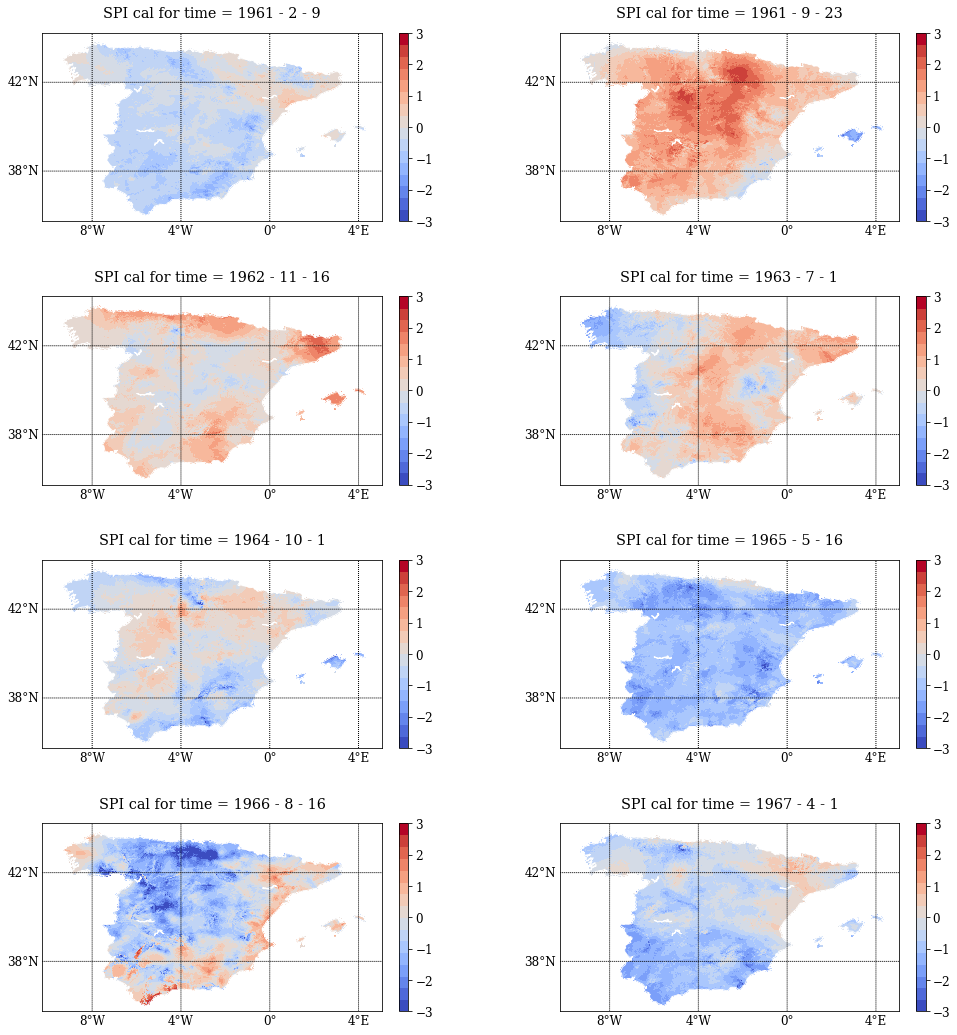

In [32]:
time_plot = [5, 90, 180, 270]
date1 = parser.parse("Jan 01 1950 00:00AM")


[XX, YY] = [XX_w_corner, YY_w_corner]

ncols, nrows = 2, 4

[c, r] = np.meshgrid(range(ncols), range(nrows))
r = r.flatten()
c = c.flatten()

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols * 8.5, nrows * 4.5)) 

# choose the colormap (https://matplotlib.org/gallery/color/colormap_reference.html)
cmap = plt.cm.get_cmap('coolwarm', 16) 

_min, _max = -3, 3


for i in range(0, len(time_plot)):

    t_plot = ref_1970 + timedelta(days = time_spi[time_plot[i]])

    map = Basemap(llcrnrlon = np.min(XX),
                  llcrnrlat = np.min(YY),
                  urcrnrlon = np.max(XX),
                  urcrnrlat = np.max(YY), 
                  resolution = 'i', 
                  lat_0 = np.min(YY), 
                  lon_0 = np.min(XX), 
                  ax = ax[i, 0])


# ---------------------------------------------------- REAL ------------------------------------------------------------

    im = ax[i, 0].pcolormesh(XX, YY, (np.ma.masked_array(spi_cal[time_plot[i]][:][:], 
                                      mask = spi_cal[time_plot[i]][:][:] < -5)), 
                                      cmap = cmap,
                                      vmin = _min, 
                                      vmax = _max)

    map.drawcoastlines(linewidth = 1, color = 'white')
    map.drawcountries(linewidth = 1, color = 'white')

    # draw parallels.
    map.drawparallels(np.arange(30,50,4),labels=[1,0,0,0])
    # draw meridians
    map.drawmeridians(np.arange(-20,5,4),labels=[0,0,0,1])

    ax[i, 0].set_title("SPI cal for time = " + str(t_plot.year) + ' - ' +  str(t_plot.month) + ' - ' +
                       str(t_plot.day), y=1.05)  # y = vertical distance between title and figure
    
    fig.colorbar(im,  ax = ax[i, 0], fraction=0.035, pad=0.04)
    
    map = Basemap(llcrnrlon = np.min(XX),
                  llcrnrlat = np.min(YY),
                  urcrnrlon = np.max(XX),
                  urcrnrlat = np.max(YY), 
                  resolution = 'i', 
                  lat_0 = np.min(YY), 
                  lon_0 = np.min(XX), 
                  ax = ax[i, 1])


# ---------------------------------------------------- REAL ------------------------------------------------------------
   
    im = ax[i, 1].pcolormesh(XX, YY, (np.ma.masked_array(spi_cal[time_plot[i] + 30][:][:], 
                                      mask = spi_cal[time_plot[i] + 30][:][:] <= -5)), 
                                      cmap = cmap,
                                      vmin = _min, 
                                      vmax = _max)

    map.drawcoastlines(linewidth = 1, color = 'white')
    map.drawcountries(linewidth = 1, color = 'white')

    # draw parallels.
    map.drawparallels(np.arange(30,50,4),labels=[1,0,0,0])
    # draw meridians
    map.drawmeridians(np.arange(-20,5,4),labels=[0,0,0,1])
    
    t_plot = ref_1970 + timedelta(days = time_spi[time_plot[i] + 30])

    ax[i, 1].set_title("SPI cal for time = " + str(t_plot.year) + ' - ' +  str(t_plot.month) + ' - ' +
                       str(t_plot.day), 
                       y = 1.05)  # y = vertical distance between title and figure

    fig.colorbar(im,  ax = ax[i, 1], fraction=0.035, pad=0.04)
    
# fig.suptitle('Spain02 daily interpolation', fontsize = 20, y=0.92)

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.4)

## 3. SPI

### 3.1. For Spain02

#### From daily precipitation

SPI 7 days

In [256]:
spi_7 = np.zeros((np.shape(prec_sp02_d)))
for y in range(0, len(YY_sp02_d)):
    for x in range(0, len(XX_sp02_d)):
        values = prec_sp02_d[:, y, x]
        scale = 7        # 7 days in order to calibrate
        data_start_year = 1950
        calibration_year_initial = 1960
        calibration_year_final = 1990
        distribution = ci.indices.Distribution.gamma
        periodicity = ci.compute.Periodicity.daily
        spi_series = indices.spi(values,
                                 scale,
                                 distribution,
                                 data_start_year,
                                 calibration_year_initial,
                                 calibration_year_final,
                                 periodicity)
        spi_7[:, y, x] = spi_series

SPI 30 days

In [257]:
spi_30 = np.zeros((np.shape(prec_sp02_d)))
for y in range(0, len(YY_sp02_d)):
    for x in range(0, len(XX_sp02_d)):
        values = prec_sp02_d[:, y, x]
        scale = 30        
        data_start_year = 1950
        calibration_year_initial = 1960
        calibration_year_final = 1990
        distribution = ci.indices.Distribution.gamma
        periodicity = ci.compute.Periodicity.daily
        spi_series = indices.spi(values,
                                 scale,
                                 distribution,
                                 data_start_year,
                                 calibration_year_initial,
                                 calibration_year_final,
                                 periodicity)
        spi_30[:, y, x] = spi_series

SPI daily

In [258]:
spi_1_mean = np.zeros((np.shape(prec_sp02_d)))
for y in range(0, len(YY_sp02_d)):
    for x in range(0, len(XX_sp02_d)):
        values = prec_sp02_d[:, y, x]
        scale = 1        
        data_start_year = 1950
        calibration_year_initial = 1960
        calibration_year_final = 1990
        distribution = ci.indices.Distribution.gamma
        periodicity = ci.compute.Periodicity.daily
        spi_series = indices.spi(values,
                                 scale,
                                 distribution,
                                 data_start_year,
                                 calibration_year_initial,
                                 calibration_year_final,
                                 periodicity)
        spi_1_mean[:, y, x] = spi_series

SPI-1 month

In [268]:
spi_1 = np.zeros((np.shape(prec_sp02_m)))
for y in range(0, len(YY_sp02_m)):
    for x in range(0, len(XX_sp02_m)):
        values = prec_sp02_m[:, y, x]
        scale = 1        # 7 days in order to calibrate
        data_start_year = 1950
        calibration_year_initial = 1960
        calibration_year_final = 1990
        distribution = ci.indices.Distribution.gamma
        periodicity = ci.compute.Periodicity.monthly
        spi_series = indices.spi(values,
                                 scale,
                                 distribution,
                                 data_start_year,
                                 calibration_year_initial,
                                 calibration_year_final,
                                 periodicity)
        spi_1[:, y, x] = spi_series

Precipitation 7 days

In [169]:
prec_sp02_agg_7 = np.zeros((np.shape(prec_sp02_d)))

for y in range(0, len(YY_sp02_d)):
    for x in range(0, len(XX_sp02_d)):
        sliding_sums = np.convolve(prec_sp02_d[:, y, x], np.ones(7), mode="valid")
        prec_sp02_agg_7[:, y, x] = np.hstack(([np.NaN] * (7 - 1), sliding_sums)) 

Precipitation 30 days

In [184]:
prec_sp02_agg_30 = np.zeros((np.shape(prec_sp02_d)))

for y in range(0, len(YY_sp02_d)):
    for x in range(0, len(XX_sp02_d)):
        sliding_sums = np.convolve(prec_sp02_d[:, y, x], np.ones(30), mode="valid")
        prec_sp02_agg_30[:, y, x] = np.hstack(([np.NaN] * (30 - 1), sliding_sums)) 

Precipitation 1 month

In [265]:
prec_sp02_agg_1 = prec_sp02_m

SPI-1 from mean SPI-7

In [349]:
spi_1_7 = np.zeros((np.shape(prec_sp02_d)))

for x in range(0, len(XX_sp02_d)):
    for i in range(21, len(time_sp02_d)):
        week1  = spi_7[i, :, x]
        week2  = spi_7[i - 7, :, x]
        week3  = spi_7[i - 14, :, x]
        week4  = spi_7[i - 21, :, x]
        spi_1_7[i, :, x] = np.nanmean([week1, week2, week3, week4], axis = 0)

spi_1_7[0:20, :, :] = [np.NaN]

In [350]:
prec_sp02_agg_1_7 = np.zeros((np.shape(prec_sp02_d)))


for x in range(0, len(XX_sp02_d)):
    for i in range(27, len(time_sp02_d)):
        week1  = prec_sp02_agg_7[i, :, x]
        week2  = prec_sp02_agg_7[i - 7, :, x]
        week3  = prec_sp02_agg_7[i - 14, :, x]
        week4  = prec_sp02_agg_7[i - 21, :, x]
        prec_sp02_agg_1_7[i, :, x] = np.nansum([week1, week2, week3, week4], axis = 0)

prec_sp02_agg_1_7[0:21, :, :] = [np.NaN] 

#### Spain02 vs. database

 Interpolation to Spain02 grid

In [37]:
spi_cal_interp = np.ones((spi_cal.shape[0], len(YY_sp02_d), len(XX_sp02_d)))*-9999

for i in range(0, len(time_spi_cal)):
    spi_cal_interp[i, :, :] = griddata((XX_w.ravel(),YY_w.ravel()),
                                       spi_cal[i,:,:].ravel(),
                                       (XX_sp,YY_sp), 
                                       method = 'nearest')

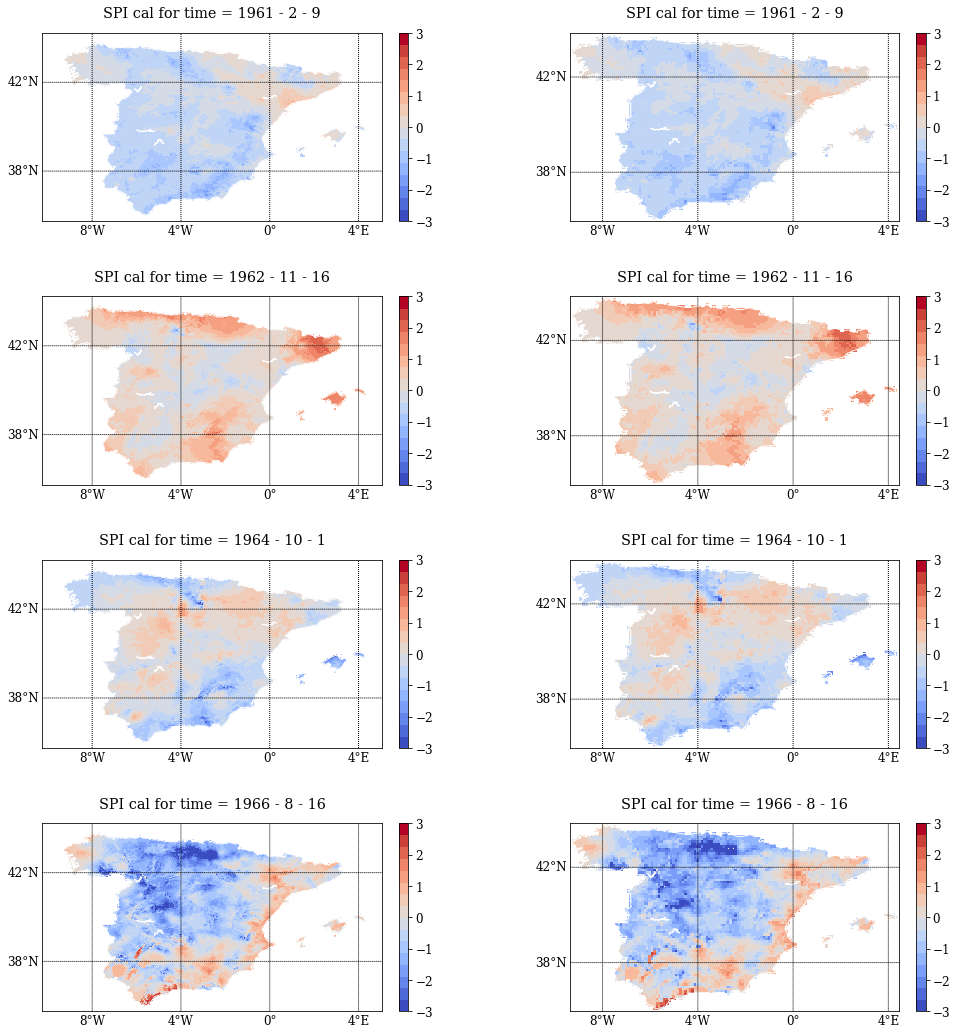

In [39]:
time_plot = [5, 90, 180, 270]
date1 = parser.parse("Jan 01 1950 00:00AM")


[XX, YY] = [XX_w_corner, YY_w_corner]

[XX_interp, YY_interp] = np.meshgrid(lons_corner_sp02, lats_corner_sp02)


ncols, nrows = 2, 4

[c, r] = np.meshgrid(range(ncols), range(nrows))
r = r.flatten()
c = c.flatten()

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols * 8.5, nrows * 4.5)) 

# choose the colormap (https://matplotlib.org/gallery/color/colormap_reference.html)
cmap = plt.cm.get_cmap('coolwarm', 16) 

_min, _max = -3, 3


for i in range(0, len(time_plot)):

    t_plot = ref_1970 + timedelta(days = time_spi[time_plot[i]])


# ------------------------------------------- REAL ------------------------------------------------ #
   
    map = Basemap(llcrnrlon = np.min(XX),
                  llcrnrlat = np.min(YY),
                  urcrnrlon = np.max(XX),
                  urcrnrlat = np.max(YY), 
                  resolution = 'i', 
                  lat_0 = np.min(YY), 
                  lon_0 = np.min(XX), 
                  ax = ax[i, 0])


    im = ax[i, 0].pcolormesh(XX, YY, (np.ma.masked_array(spi_cal[time_plot[i]][:][:], 
                                      mask = spi_cal[time_plot[i]][:][:] < -10)), 
                                      cmap = cmap,
                                      vmin = _min, 
                                      vmax = _max)

#     for valor in

    
    map.drawcoastlines(linewidth=1, color='white')
    map.drawcountries(linewidth=1, color='white')

    # draw parallels.
    map.drawparallels(np.arange(30,50,4),labels=[1,0,0,0])
    # draw meridians
    map.drawmeridians(np.arange(-20,5,4),labels=[0,0,0,1])

    ax[i, 0].set_title("SPI cal for time = " + str(t_plot.year) + ' - ' +  str(t_plot.month) + ' - ' +
                       str(t_plot.day), y=1.05)  # y = vertical distance between title and figure
    
    fig.colorbar(im,  ax = ax[i, 0], fraction=0.035, pad=0.04)


# ------------------------------------------ INTERP ------------------------------------------------ #    
    

    
    map = Basemap(llcrnrlon = np.min(XX_interp),
                  llcrnrlat = np.min(YY_interp),
                  urcrnrlon = np.max(XX_interp),
                  urcrnrlat = np.max(YY_interp), 
                  resolution = 'i', 
                  lat_0 = np.min(YY_interp), 
                  lon_0 = np.min(XX_interp), 
                  ax = ax[i, 1])


    im = ax[i, 1].pcolormesh(XX_interp, YY_interp, 
                            (np.ma.masked_array(spi_cal_interp[time_plot[i]][:][:], 
                               mask = spi_cal_interp[time_plot[i]][:][:] <= -5)), 
                               cmap = cmap,
                               vmin = _min, 
                               vmax = _max)


    map.drawcoastlines(linewidth=1, color='white')
    map.drawcountries(linewidth=1, color='white')

    # draw parallels.
    map.drawparallels(np.arange(30,50,4),labels=[1,0,0,0])
    # draw meridians
    map.drawmeridians(np.arange(-20,5,4),labels=[0,0,0,1])
    
    ax[i, 1].set_title("SPI cal for time = " + str(t_plot.year) + ' - ' +  str(t_plot.month) + ' - ' +
                       str(t_plot.day), 
                       y = 1.05)  # y = vertical distance between title and figure

    fig.colorbar(im,  ax = ax[i, 1], fraction=0.035, pad=0.04)
    
# fig.suptitle('Spain02 daily interpolation', fontsize = 20, y=0.92)

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.4)

Comparison

In [351]:
agg                  = str(1_7)
spi_calculated       = spi_1_7 
prec_calculated      = prec_sp02_agg_1_7
time_calculated_date = time_sp02_d_date
time_calculated      = time_sp02_d

if np.unique(time_calculated == time_sp02_m)[0] == True:
    time_spi_cal_date_graph = time_spi_cal_date.copy()
    for i in range(0, len(time_spi_cal_date_graph)):
        if time_spi_cal_date_graph[i].day == 16: 
            time_spi_cal_date_graph[i] = time_spi_cal_date_graph[i].replace(day = 15)
else: 
    time_spi_cal_date_graph = time_spi_cal_date.copy()

index_same_dates   = np.where(np.isin(time_calculated_date, time_spi_cal_date_graph))[0]
same_dates         = time_calculated[index_same_dates]
spi_comparison     = spi_calculated[index_same_dates, :, :]
prec_comparison    = prec_calculated[index_same_dates, :, :]

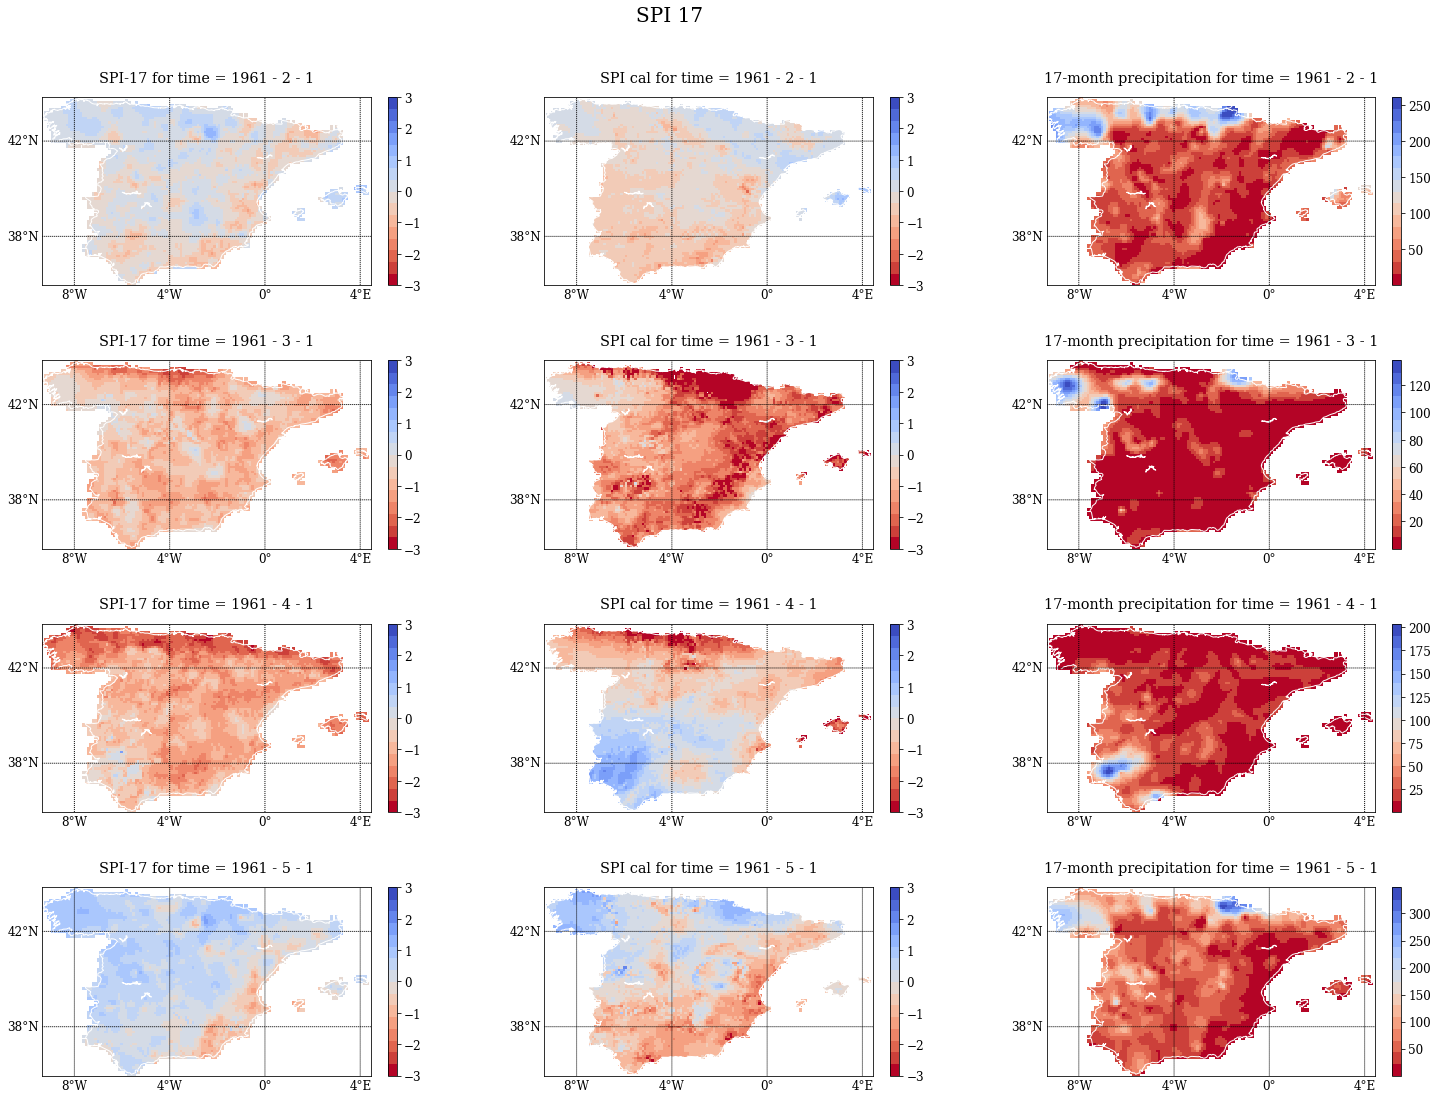

In [353]:
time_plot     = [4, 8, 12, 16]


[XX, YY] = np.meshgrid(lons_corner_sp02, lats_corner_sp02)

ncols, nrows = 3, 4

[c, r] = np.meshgrid(range(ncols), range(nrows))
r = r.flatten()
c = c.flatten()

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols * 8.5, nrows * 4.5)) 

# choose the colormap (https://matplotlib.org/gallery/color/colormap_reference.html)
cmap = plt.cm.get_cmap('coolwarm', 16) 
cmap_r = plt.cm.get_cmap('coolwarm_r', 16) 

_min, _max = -3, 3


for i in range(0, len(time_plot)):

    t_plot = ref_1950 + timedelta(days = same_dates[time_plot[i]])

    map = Basemap(llcrnrlon=np.min(XX),
                  llcrnrlat=np.min(YY),
                  urcrnrlon=np.max(XX),
                  urcrnrlat=np.max(YY), 
                  resolution = 'i', 
                  lat_0 =np.min(YY), 
                  lon_0 =np.min(XX), 
                  ax = ax[i, 0])


# ------------------------------------------------------------------------------------------ #

    im = ax[i, 0].pcolormesh(XX, YY, (np.ma.masked_array(spi_comparison[time_plot[i]][:][:], 
                                      mask = spi_comparison[time_plot[i]][:][:] < -5)), 
                                      cmap = cmap_r,
                                      vmin = _min, 
                                      vmax = _max)

    map.drawcoastlines(linewidth=1, color='white')
    map.drawcountries(linewidth=1, color='white')

    # draw parallels.
    map.drawparallels(np.arange(30,50,4),labels=[1,0,0,0])
    # draw meridians
    map.drawmeridians(np.arange(-20,5,4),labels=[0,0,0,1])

    ax[i, 0].set_title("SPI-" + agg + " for time = " + str(t_plot.year) + ' - ' +  
                       str(t_plot.month) + ' - ' +
                       str(t_plot.day),y=1.05)  # y = vertical distance between title and figure
    
    fig.colorbar(im,  ax = ax[i, 0], fraction=0.035, pad=0.04)
    
    
        
    map = Basemap(llcrnrlon=np.min(XX),
                  llcrnrlat=np.min(YY),
                  urcrnrlon=np.max(XX),
                  urcrnrlat=np.max(YY), 
                  resolution = 'i', 
                  lat_0 =np.min(YY), 
                  lon_0 =np.min(XX), 
                  ax = ax[i, 1])


# ------------------------------------------------------------------------------------------ #

    im = ax[i, 1].pcolormesh(XX, YY, (np.ma.masked_array(spi_cal_interp[time_plot[i]][:][:], 
                                      mask = spi_cal_interp[time_plot[i]][:][:] < -5)), 
                                      cmap = cmap_r,
                                      vmin = _min, 
                                      vmax = _max)

    map.drawcoastlines(linewidth=1, color='white')
    map.drawcountries(linewidth=1, color='white')

    # draw parallels.
    map.drawparallels(np.arange(30,50,4),labels=[1,0,0,0])
    # draw meridians
    map.drawmeridians(np.arange(-20,5,4),labels=[0,0,0,1])

    ax[i, 1].set_title("SPI cal for time = "  + str(t_plot.year) + ' - ' + 
                       str(t_plot.month) + ' - ' +
                       str(t_plot.day), y=1.05)  # y = vertical distance between title and figure

    fig.colorbar(im,  ax = ax[i, 1], fraction=0.035, pad=0.04)
    

    map = Basemap(llcrnrlon=np.min(XX),
                  llcrnrlat=np.min(YY),
                  urcrnrlon=np.max(XX),
                  urcrnrlat=np.max(YY), 
                  resolution = 'i', 
                  lat_0 =np.min(YY), 
                  lon_0 =np.min(XX), 
                  ax = ax[i, 2])


# ------------------------------------------------------------------------------------------ #

    im = ax[i, 2].pcolormesh(XX, YY, (np.ma.masked_array(prec_comparison[time_plot[i]][:][:], 
                                      mask = prec_comparison[time_plot[i]][:][:] <= 0)), 
                                      cmap = cmap_r)

    map.drawcoastlines(linewidth=1, color='white')
    map.drawcountries(linewidth=1, color='white')

    # draw parallels.
    map.drawparallels(np.arange(30,50,4),labels=[1,0,0,0])
    # draw meridians
    map.drawmeridians(np.arange(-20,5,4),labels=[0,0,0,1])

    ax[i, 2].set_title(agg + "-month precipitation for time = "  + str(t_plot.year) + ' - ' + 
                       str(t_plot.month) + ' - ' +
                       str(t_plot.day), y=1.05)  # y = vertical distance between title and figure

    fig.colorbar(im,  ax = ax[i, 2], fraction=0.035, pad=0.04)
    

fig.suptitle('SPI '+ agg +' ', fontsize = 20, y = 0.95)

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.4)

plt.savefig('SPI' + agg +'.png', dpi=450, facecolor='w', edgecolor='w',
        orientation='portrait', bbox_inches = 'tight', pad_inches=0.1)


#### SPI monthly aggregation

In [ ]:
last_day = time_sp02_d_date[-1].day

if last_day < 30:    # I've assuming all months having 30 days
    spi_d_mod = spi_d[:last_day, :, :]   

c = 0
for y in range(0, len(YY_sp02_m)):
    for x in range(0, len(XX_sp02_m)):
        df = pd.Series(spi_d[:, y, x], index = time_sp02_d_date)
        multiMmean = df.resample("M", how = 'mean')
        if c == 0:
            spi_d_agg = np.zeros((len(multiMmean), np.shape(spi_d)[1], np.shape(spi_d)[2]))
            c = 1
                
        spi_d_agg[:, y, x] = multiMmean[:].tolist()
        

In [ ]:
a = np.convolve(spi_d[:, y, x], np.ones(12))

In [ ]:
b = np.random.rand(50)

In [ ]:
last_day = time_cfs_d_date[-1].day

In [ ]:
last_day

### 3.2. For CFSv2 

In [ ]:
spi.shape

In [ ]:
len(values)

### SPI

In [247]:
def transform_fitted_gamma(
    values, data_start_year, calibration_start_year, calibration_end_year, periodicity
):
    """
    Fit values to a gamma distribution and transform the values to corresponding
    normalized sigmas.
    :param values: 2-D array of values, with each row typically representing a year
                   containing twelve columns representing the respective calendar
                   months, or 366 days per column as if all years were leap years
    :param data_start_year: the initial year of the input values array
    :param calibration_start_year: the initial year to use for the calibration period
    :param calibration_end_year: the final year to use for the calibration period
    :param periodicity: the type of time series represented by the input data, valid values are 'monthly' or 'daily'
                             'monthly': array of monthly values, assumed to span full years, i.e. the first value
                             corresponds to January of the initial year and any missing final months of the final
                             year filled with NaN values, with size == # of years * 12
                             'daily': array of full years of daily values with 366 days per year, as if each year were
                             a leap year and any missing final months of the final year filled with NaN values,
                             with array size == (# years * 366)
    :return: 2-D array of transformed/fitted values, corresponding in size and shape of the input array
    :rtype: numpy.ndarray of floats
    """

    # if we're passed all missing values then we can't compute anything, return the same array of missing values
    if (np.ma.is_masked(values) and values.mask.all()) or np.all(np.isnan(values)):
        return values

    # validate (and possibly reshape) the input array
    values = _validate_array(values, periodicity)

    # find the percentage of zero values for each time step
    zeros = (values == 0).sum(axis=0)
    probabilities_of_zero = zeros / values.shape[0]

    # replace zeros with NaNs
    values[values == 0] = np.NaN

    # determine the end year of the values array
    data_end_year = data_start_year + values.shape[0]

    # make sure that we have data within the full calibration period, otherwise use the full period of record
    if (calibration_start_year < data_start_year) or (
        calibration_end_year > data_end_year
    ):
        calibration_start_year = data_start_year
        calibration_end_year = data_end_year

    # get the year axis indices corresponding to the calibration start and end years
    calibration_begin_index = calibration_start_year - data_start_year
    calibration_end_index = (calibration_end_year - data_start_year) + 1

    # get the values for the current calendar time step that fall within the calibration years period
    calibration_values = values[calibration_begin_index:calibration_end_index, :]

    # compute the gamma distribution's shape and scale parameters, alpha and beta
    # TODO explain this better
    means = np.nanmean(calibration_values, axis=0)
    log_means = np.log(means)
    logs = np.log(calibration_values)
    mean_logs = np.nanmean(logs, axis=0)
    a = log_means - mean_logs
    alphas = (1 + np.sqrt(1 + 4 * a / 3)) / (4 * a)
    betas = means / alphas
    print(alphas.shape)
    print(values.shape)

    # find the gamma probability values using the gamma CDF
    gamma_probabilities = stats.gamma.cdf(values, a=alphas, scale=betas)

    # TODO explain this
    # (normalize including the probability of zero, putting into the range [0..1]?)
    probabilities = probabilities_of_zero + (
        (1 - probabilities_of_zero) * gamma_probabilities
    )

    # the values we'll return are the values at which the probabilities of a normal distribution
    # are less than or equal to the computed probabilities, as determined by the normal distribution's
    # quantile (or inverse cumulative distribution) function
    return stats.norm.ppf(probabilities)

In [194]:
def sum_to_scale(values, scale):
    """
    Compute a sliding sums array using 1-D convolution. The initial
    (scale - 1) elements of the result array will be padded with np.NaN values.
    Missing values are not ignored, i.e. if a np.NaN
    (missing) value is part of the group of values to be summed then the sum
    will be np.NaN
    For example if the first array is [3, 4, 6, 2, 1, 3, 5, 8, 5] and
    the number of values to sum is 3 then the resulting array
    will be [np.NaN, np.NaN, 13, 12, 9, 6, 9, 16, 18].
    More generally:
    Y = f(X, n)
    Y[i] == np.NaN, where i < n
    Y[i] == sum(X[i - n + 1:i + 1]), where i >= n - 1 and X[i - n + 1:i + 1] contains no NaN values
    Y[i] == np.NaN, where i >= n - 1 and X[i - n + 1:i + 1] contains one or more NaN values
    :param values: the array of values over which we'll compute sliding sums
    :param scale: the number of values for which each sliding summation will encompass, for example if this value
                  is 3 then the first two elements of the output array will contain the pad value and the third
                  element of the output array will contain the sum of the first three elements, and so on
    :return: an array of sliding sums, equal in length to the input values array, left padded with NaN values
    """

    # don't bother if the number of values to sum is 1 (will result in duplicate array)
    if scale == 1:
        return values

    # get the valid sliding summations with 1D convolution
    sliding_sums = np.convolve(values, np.ones(scale), mode="valid")

    # pad the first (n - 1) elements of the array with NaN values
    return np.hstack(([np.NaN] * (scale - 1), sliding_sums))

In [291]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [290]:
sum_to_scale(np.arange(100), 10)

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  45.,  55.,
        65.,  75.,  85.,  95., 105., 115., 125., 135., 145., 155., 165.,
       175., 185., 195., 205., 215., 225., 235., 245., 255., 265., 275.,
       285., 295., 305., 315., 325., 335., 345., 355., 365., 375., 385.,
       395., 405., 415., 425., 435., 445., 455., 465., 475., 485., 495.,
       505., 515., 525., 535., 545., 555., 565., 575., 585., 595., 605.,
       615., 625., 635., 645., 655., 665., 675., 685., 695., 705., 715.,
       725., 735., 745., 755., 765., 775., 785., 795., 805., 815., 825.,
       835., 845., 855., 865., 875., 885., 895., 905., 915., 925., 935.,
       945.])

In [195]:
def _validate_array(values, periodicity):
    """
    :param values:
    :param periodicity:
    :return:
    """

    # validate (and possibly reshape) the input array
    if len(values.shape) == 1:

        if periodicity is None:
            message = "1-D input array requires a corresponding periodicity argument, none provided"
            _logger.error(message)
            raise ValueError(message)

        elif periodicity is Periodicity.monthly:
            # we've been passed a 1-D array with shape (months),
            # reshape it to 2-D with shape (years, 12)
            values = utils.reshape_to_2d(values, 12)

        elif periodicity is Periodicity.daily:
            # we've been passed a 1-D array with shape (days),
            # reshape it to 2-D with shape (years, 366)
            values = utils.reshape_to_2d(values, 366)

        else:
            message = "Unsupported periodicity argument: '{0}'".format(periodicity)
            _logger.error(message)
            raise ValueError(message)

    elif (len(values.shape) != 2) or (values.shape[1] != 12 and values.shape[1] != 366):

        # neither a 1-D nor a 2-D array with valid shape was passed in
        message = "Invalid input array with shape: {0}".format(values.shape)
        _logger.error(message)
        raise ValueError(message)

    return values

def reshape_to_2d(values: np.ndarray,
                  second_axis_length: int) -> np.ndarray:
    """
    :param values: an 1-D numpy.ndarray of values
    :param second_axis_length:
    :return: the original values reshaped to 2-D, with shape
        [int(original length / second axis length), second axis length]
    :rtype: 2-D numpy.ndarray of floats
    """

    # if we've been passed a 2-D array with valid shape then let it pass through
    shape = values.shape
    if len(shape) == 2:
        if shape[1] == second_axis_length:
            # data is already in the shape we want, return it unaltered
            return values
        else:
            message = "Values array has an invalid shape (2-D but " + \
                      f"second dimension not {second_axis_length}): {shape}"
            _logger.error(message)
            raise ValueError(message)

    # otherwise make sure that we've been passed a flat (1-D) array of values
    elif len(shape) != 1:
        message = f"Values array has an invalid shape (not 1-D or 2-D): {shape}"
        _logger.error(message)
        raise ValueError(message)

    # pad the end of the original array in order
    # to have an ordinal increment, if necessary
    final_year_values = shape[0] % second_axis_length
    if final_year_values > 0:
        pads = second_axis_length - final_year_values
        values = np.pad(values,
                        pad_width=(0, pads),
                        mode="constant",
                        constant_values=np.NaN)

    # we should have an ordinal number of years now
    # (ordinally divisible by second_axis_length)
    first_axis_length = int(values.shape[0] / second_axis_length)

    # return the reshaped array
    return np.reshape(values, newshape=(first_axis_length, second_axis_length))

In [204]:
def spi_m(values: np.ndarray,
        scale: int,
        distribution,
        data_start_year: int,
        calibration_year_initial: int,
        calibration_year_final: int,
        periodicity):
    """
    Computes SPI (Standardized Precipitation Index).
    :param values: 1-D numpy array of precipitation values, in any units,
        first value assumed to correspond to January of the initial year if
        the periodicity is monthly, or January 1st of the initial year if daily
    :param scale: number of time steps over which the values should be scaled
        before the index is computed
    :param distribution: distribution type to be used for the internal
        fitting/transform computation
    :param data_start_year: the initial year of the input precipitation dataset
    :param calibration_year_initial: initial year of the calibration period
    :param calibration_year_final: final year of the calibration period
    :param periodicity: the periodicity of the time series represented by the
        input data, valid/supported values are 'monthly' and 'daily'
        'monthly' indicates an array of monthly values, assumed to span full
         years, i.e. the first value corresponds to January of the initial year
         and any missing final months of the final year filled with NaN values,
         with size == # of years * 12
         'daily' indicates an array of full years of daily values with 366 days
         per year, as if each year were a leap year and any missing final months
         of the final year filled with NaN values, with array size == (# years * 366)
    :return SPI values fitted to the gamma distribution at the specified time
        step scale, unitless
    :rtype: 1-D numpy.ndarray of floats of the same length as the input array
        of precipitation values
    """

    # we expect to operate upon a 1-D array, so if we've been passed a 2-D array
    # then we flatten it, otherwise raise an error
    shape = values.shape
    if len(shape) == 2:
        values = values.flatten()
    elif len(shape) != 1:
        message = f"Invalid shape of input array: {shape} -- " + \
                  "only 1-D and 2-D arrays are supported"
        _logger.error(message)
        raise ValueError(message)

    # if we're passed all missing values then we can't compute
    # anything, so we return the same array of missing values
    if (np.ma.is_masked(values) and values.mask.all()) or np.all(np.isnan(values)):
        return values

    # remember the original length of the array, in order to facilitate
    # returning an array of the same size
    original_length = values.size

    # get a sliding sums array, with each time step's value scaled
    # by the specified number of time steps
    values = sum_to_scale(values, scale)

    # reshape precipitation values to (years, 12) for monthly,
    # or to (years, 366) for daily
    if periodicity is 'monthly':

        values = reshape_to_2d(values, 12)

    elif periodicity is 'daily':

        values = reshape_to_2d(values, 366)

    else:

        raise ValueError("Invalid periodicity argument: %s" % periodicity)

    if distribution is 'gamma':

        # fit the scaled values to a gamma distribution
        # and transform to corresponding normalized sigmas
        values = transform_fitted_gamma(values,
                                                data_start_year,
                                                calibration_year_initial,
                                                calibration_year_final,
                                                periodicity)
    elif distribution is 'pearson':

        # fit the scaled values to a Pearson Type III distribution
        # and transform to corresponding normalized sigmas
        values = transform_fitted_pearson(values,
                                                  data_start_year,
                                                  calibration_year_initial,
                                                  calibration_year_final,
                                                  periodicity)

    else:

        message = f"Unsupported distribution argument: {distribution}"
        _logger.error(message)
        raise ValueError(message)

    # clip values to within the valid range, reshape the array back to 1-D
    _FITTED_INDEX_VALID_MIN = -3.09
    _FITTED_INDEX_VALID_MAX = 3.09
    values = np.clip(values, _FITTED_INDEX_VALID_MIN, _FITTED_INDEX_VALID_MAX).flatten()

    # return the original size array
    return values[0:original_length]

In [205]:
spi = np.zeros((np.shape(prec_sp02_d)))
for y in range(0, len(YY_sp02_d)):
    for x in range(0, len(XX_sp02_d)):
        values = prec_sp02_d[:, y, x]
        scale = 30        # 7 days in order to calibrate
        data_start_year = 1950
        calibration_year_initial = 1960
        calibration_year_final = 1990
        distribution = 'gamma'
        periodicity = 'monthly'
        spi_series = spi_m(values,
                                 scale,
                                 distribution,
                                 data_start_year,
                                 calibration_year_initial,
                                 calibration_year_final,
                                 periodicity)
        spi[:, y, x] = spi_series

In [229]:
prec_sp02_d.shape

(24106, 79, 138)

In [255]:
x = 65
y = 35
values = prec_sp02_m[:, y, x]
scale = 30        # 7 days in order to calibrate
data_start_year = 1950
calibration_year_initial = 1960
calibration_year_final = 1990
distribution = 'gamma'
periodicity = 'monthly'   # periodicity of the prec data
spi_series = spi_m(values,
                         scale,
                         distribution,
                         data_start_year,
                         calibration_year_initial,
                         calibration_year_final,
                         periodicity)
# spi[:, y, x] = spi_series

(12,)
(66, 12)


In [250]:
values.shape

(24106,)

In [251]:
time_sp02_d.shape

(24106,)